In [179]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [180]:
# function to load the simulation data from the json file
def load_config(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [181]:
config = load_config('simulation_data.json')

# Convert the json file data into a pandas DataFrame
df = pd.DataFrame(config)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.385828,1.897776,1.057944,0.753405,2.287386,1.101137,0.867812,2.321133,1.434985,1.323041,...,3.519812,2.591424,3.299626,3.845605,3.781940,4.287855,4.208413,4.833322,5.075128,6.555409
1,0.697893,0.410271,0.000000,1.549045,0.996131,0.499238,0.628804,0.928829,0.768682,0.891444,...,1.394516,0.671079,1.389588,0.000000,1.883122,1.480497,2.121556,0.888019,1.482421,1.771598
2,0.168526,1.838204,0.000000,1.369092,2.163172,0.788791,1.260492,0.319531,0.432058,1.073576,...,0.457386,1.769429,0.665047,1.871035,0.000000,1.438693,1.552610,0.000000,0.985628,2.101822
3,0.000000,1.652587,0.204941,0.761762,0.267802,1.876669,0.651687,0.237553,1.887206,1.327697,...,1.300243,1.821961,0.001296,1.035246,0.443064,1.253738,0.300140,0.969453,0.000000,1.095518
4,0.350416,0.918710,1.514020,1.310958,1.413264,0.000000,1.120072,0.818813,1.996601,0.237456,...,0.219957,0.277314,0.752388,1.913603,1.949324,1.280853,0.068675,1.303856,1.997399,0.821971


In [182]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(df, value_name="Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
df.index = df.index + 1 # this switches the x-axis labels to strat from 1 instead of 0



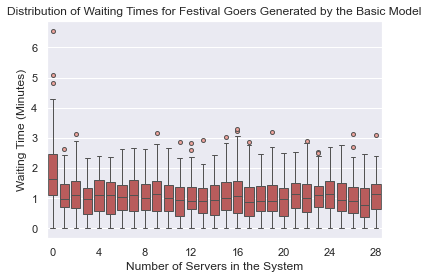

In [183]:
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


xticks_interval = 4
labels = ax.get_xticks()[::xticks_interval] 
ax.set_xticks(labels)

plt.title("Distribution of Waiting Times for Festival Goers Generated by the Basic Model")
plt.xlabel("Number of Servers in the System")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

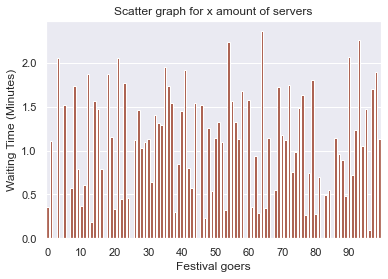

In [184]:
# PLotting the scatter graph for x amount of servers. 
# We extract a row from the dataframe and plot the waiting time on the y axis and the festival goer on the x axis
selected_row = df.iloc[5]
#sns.scatterplot(x=selected_row.index, y=selected_row.values)
bx = sns.barplot(x=selected_row.index, y= selected_row.values, color="#bc5a45" )

bxticks_interval =10
blabels = bx.get_xticks()[::bxticks_interval] 
bx.set_xticks(blabels)

plt.title("Scatter graph for x amount of servers")
plt.xlabel("Festival goers")
plt.ylabel("Waiting Time (Minutes)")
plt.show()


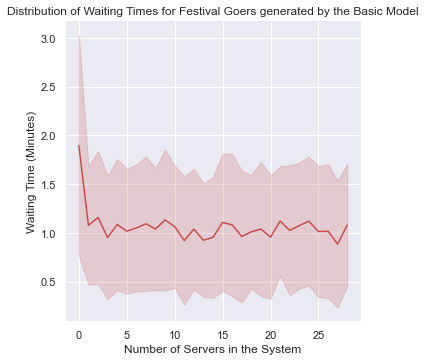

In [185]:
sns.relplot(x=df_melted.index, y="Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c") #color="#034f84")

plt.title("Distribution of Waiting Times for Festival Goers generated by the Basic Model")
plt.xlabel("Number of Servers in the System")
plt.ylabel("Waiting Time (Minutes)")
plt.show()